<a href="https://colab.research.google.com/github/yulianindahs27-rgb/-Data-Mining-Project/blob/main/Kelompok_8_SML_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 8**

Anggota :
1. Muh. Afrizal 24050122130059
2. Nala Firdausi 24050122130052
3. Yulian Indah 24050122140162
4. Yuana Dian 24050122140178



## **Data Preprocessing**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data
df = pd.read_csv("/content/garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


<Axes: >

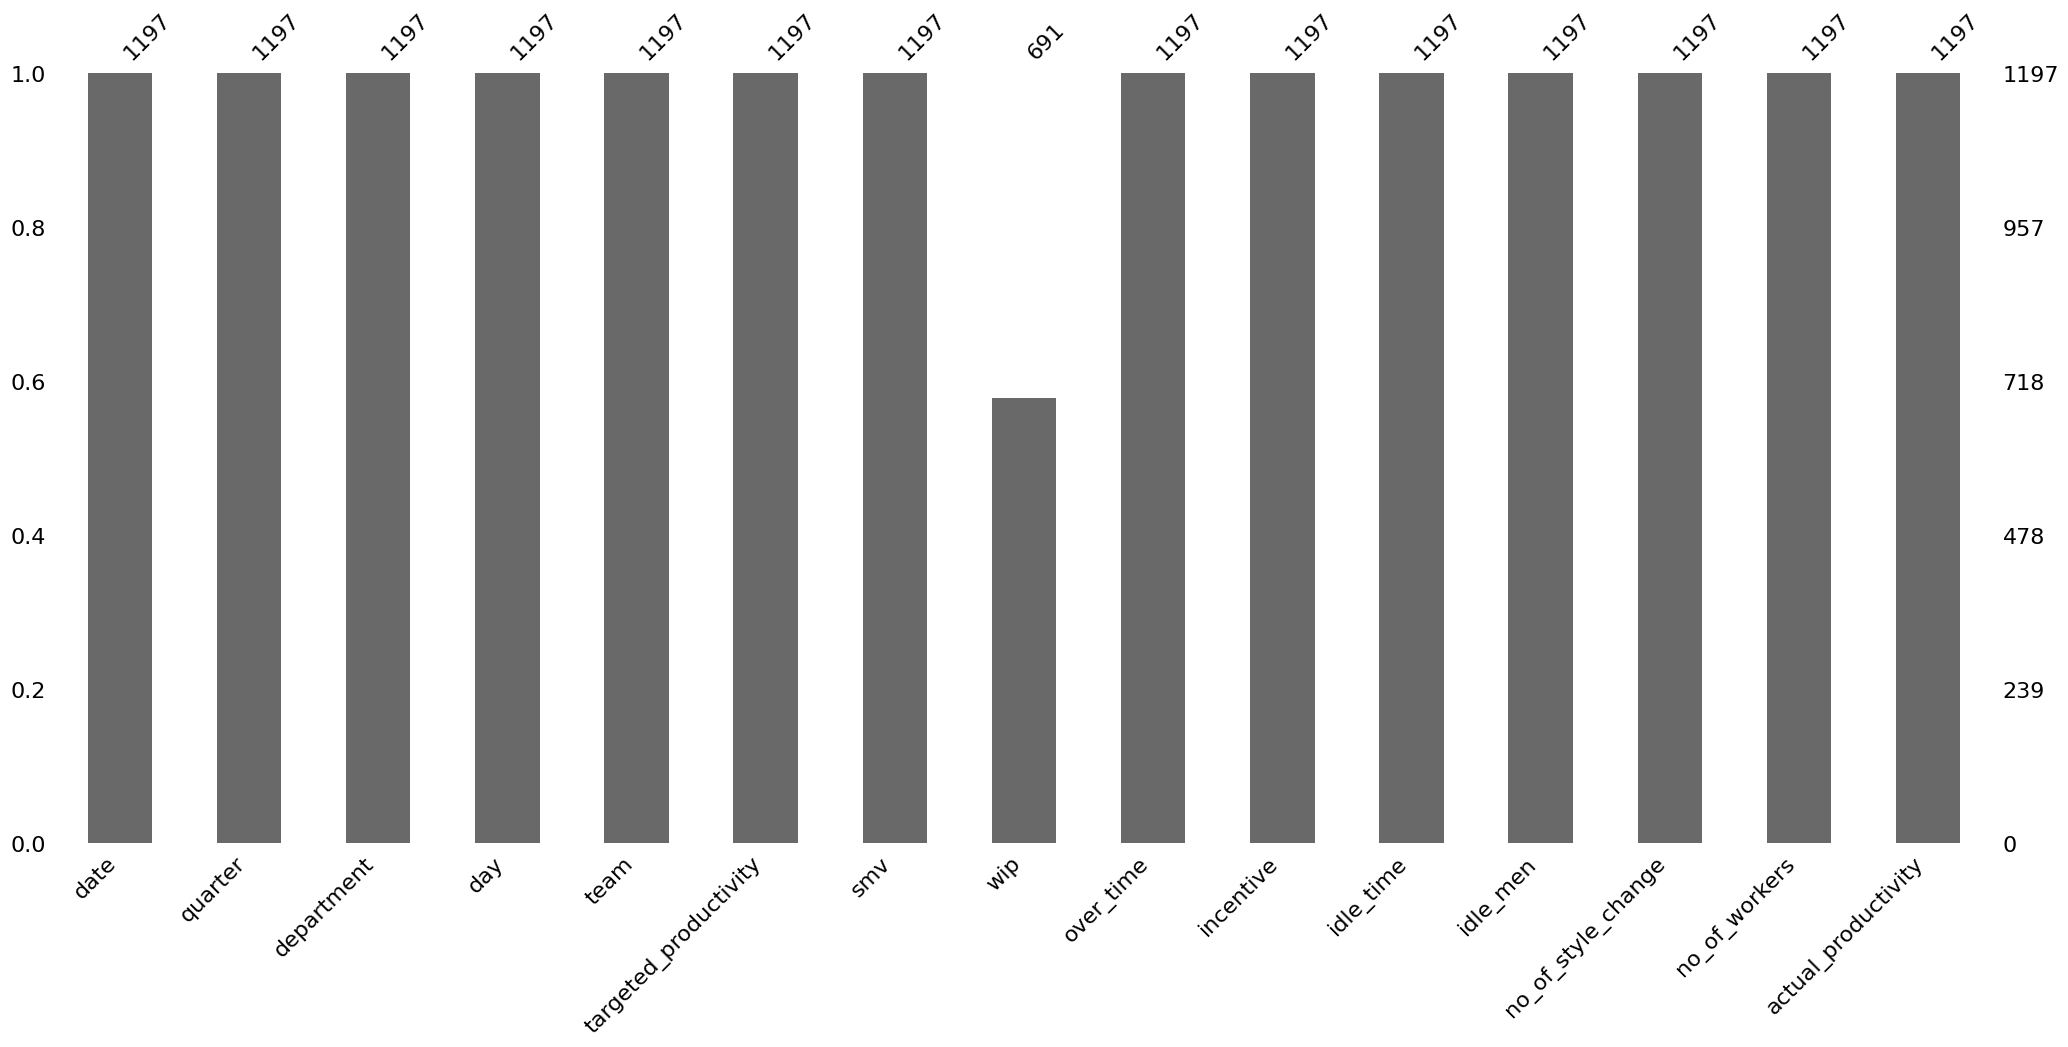

In [ ]:
msno.bar(df)

<Axes: >

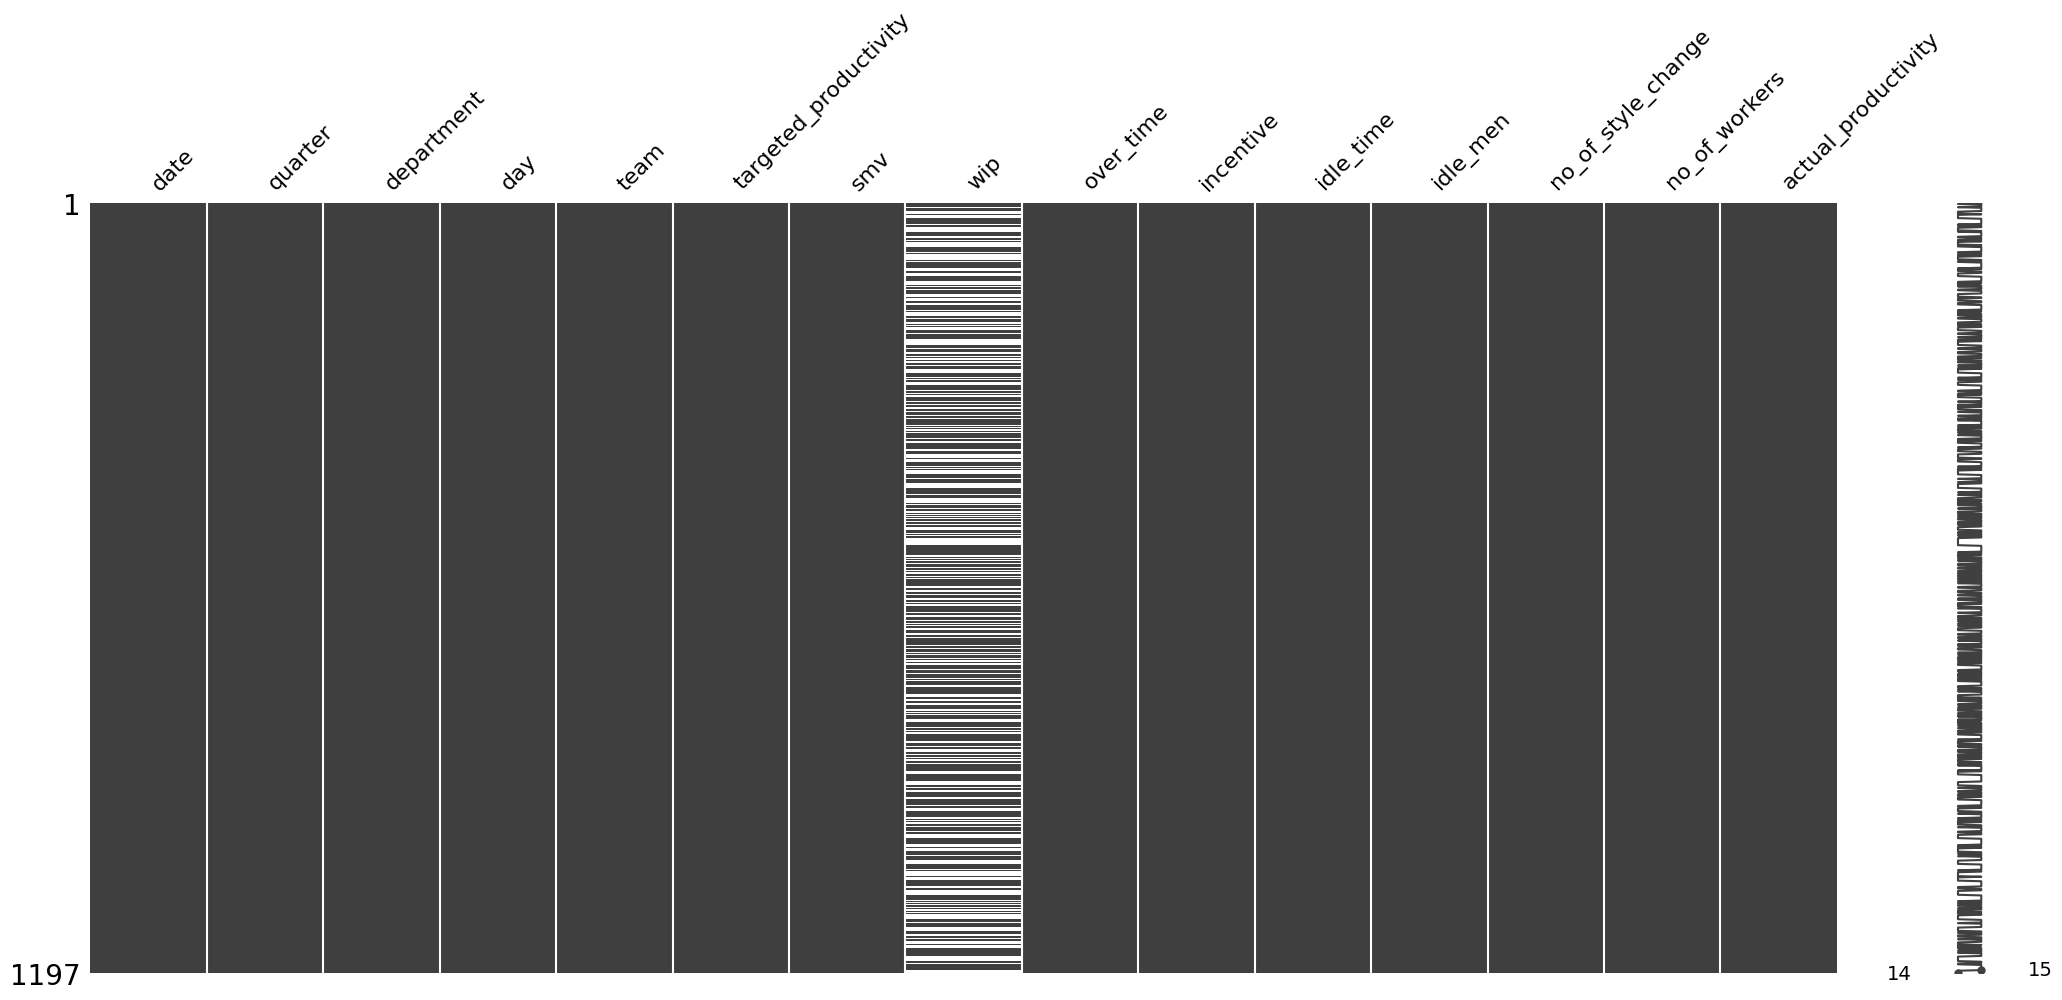

In [ ]:
msno.matrix(df)

In [ ]:
df['wip'].fillna(0, inplace=True)


<ipython-input-487-96a2d9319b0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(0, inplace=True)


In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['over_time'] = df['over_time'].astype(float)
df['incentive'] = df['incentive'].astype(float)
df['no_of_workers'] = df['no_of_workers'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   float64       
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960.0,0.0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0,0,56,0.800382


In [ ]:
# Bersihkan spasi di awal & akhir untuk semua kolom bertipe object
for col in df.select_dtypes(include=['int',]).columns:
    df[col] = df[col].str.strip()

# Tampilkan semua nilai unik untuk tiap kolom object dan int
for col in df.select_dtypes(include=['object', 'int']).columns:
    print(f"Nilai unik di kolom '{col}':")
    print(df[col].unique())  # Menampilkan semua nilai unik
    print("-" * 50)


NameError: name 'df' is not defined

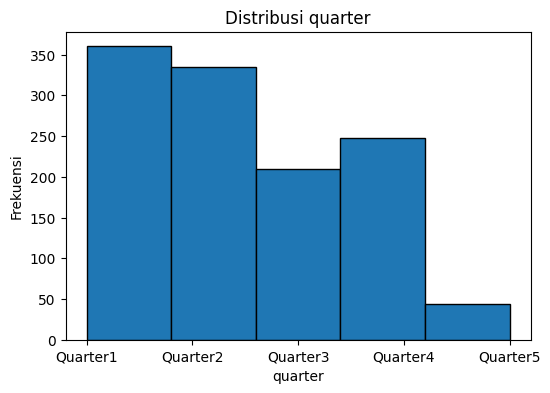

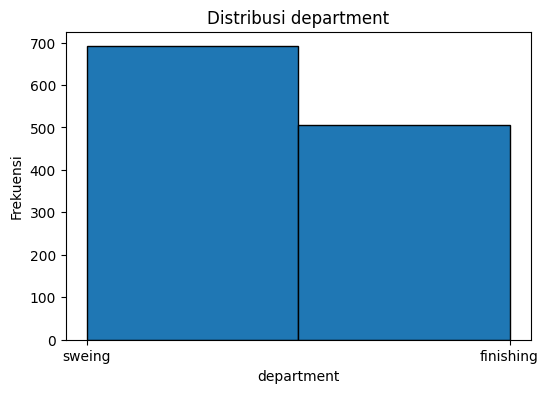

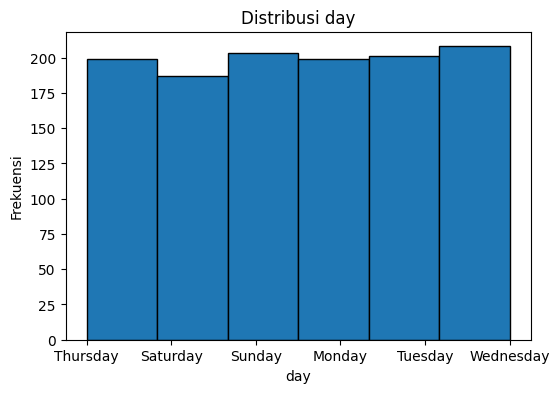

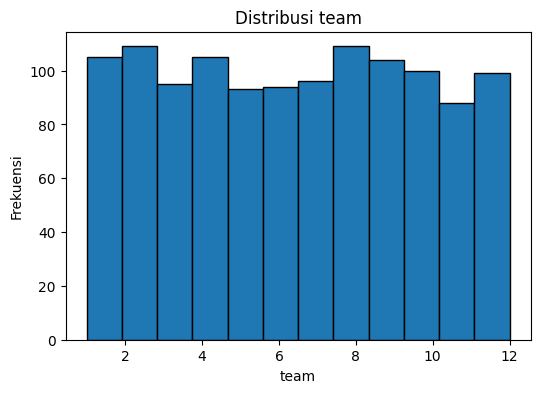

In [ ]:
import matplotlib.pyplot as plt

# Loop untuk keempat kolom
for col in ['quarter', 'department', 'day', 'team']:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=len(df[col].unique()), edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {col}')
    plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Daftar kolom yang ingin diencoding
selected_cols = ['quarter', 'department', 'day', 'team']

# Inisialisasi encoder dengan drop first untuk menghindari multikolinearitas
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit-transform ke data
encoded_array = encoder.fit_transform(df[selected_cols])

# Ubah ke DataFrame pandas dengan nama kolom dari encoder
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(selected_cols))

# Gabungkan hasil encoding dengan data asli, tanpa menghapus kolom asli
df = pd.concat([df, df_encoded], axis=1)

print(df.head())


        date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  ...  team_3  team_4  team_5  team_6  \
0  26.16  1108.0     7080.0       98.0  ...     0.0     0.0     0.0     0.0   
1   3.94     0.0      960.0        0.0  ...     0.0     0.0     0.0     0.0   
2  11.41   968.0     3660.0       50.0  ...     0.0     0.0     0.0     0.0   
3  11.41   968.0     3660.0       50.0  ...     0.0     0.0     0.0     0.0   
4  25.90  1170.0     1920.0       50.0  ...     0.0     0.0     0.0     1.0   

   team_7  team_8  team_9  team_10  team_11  team_12  
0     0.0    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   float64       
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

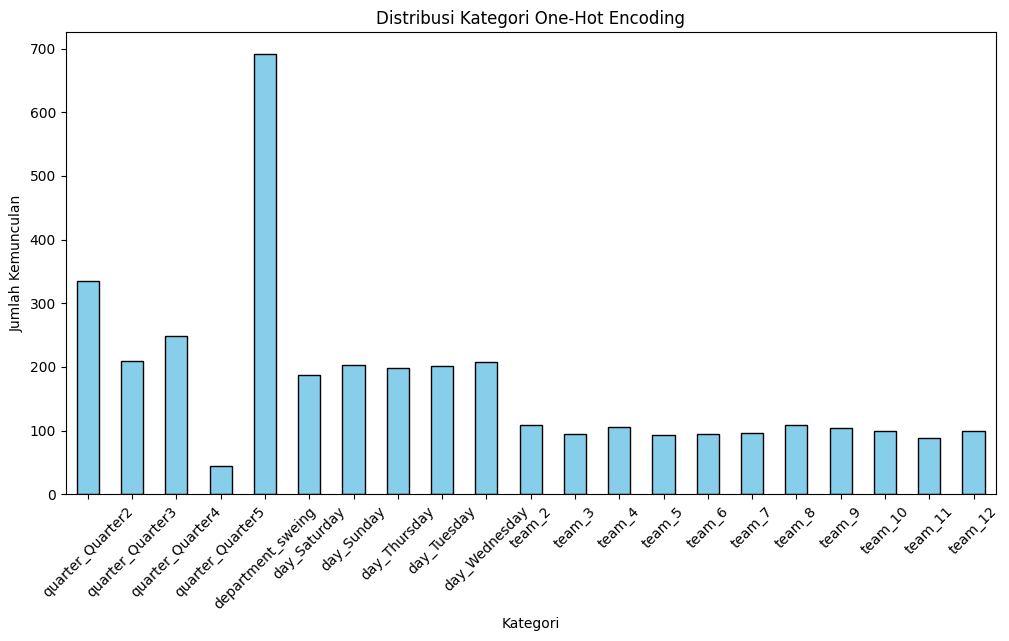

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_encoded.sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel("Kategori")
plt.ylabel("Jumlah Kemunculan")
plt.title("Distribusi Kategori One-Hot Encoding")
plt.show()


In [ ]:
print(df['quarter'].value_counts(normalize=True))  # Persentase tiap kelas
imbalance_ratio = df['quarter'].value_counts().max() / df['quarter'].value_counts().min()
print(f"Rasio kelas mayoritas terhadap minoritas: {imbalance_ratio:.2f}")

# Cek distribusi kategori di 'department'
print("Distribusi Department:")
print(df['department'].value_counts(normalize=True))  # Persentase tiap kelas
imbalance_ratio_dept = df['department'].value_counts().max() / df['department'].value_counts().min()
print(f"Rasio kelas mayoritas terhadap minoritas (Department): {imbalance_ratio_dept:.2f}\n")

# Cek distribusi kategori di 'day'
print("Distribusi Day:")
print(df['day'].value_counts(normalize=True))  # Persentase tiap kelas
imbalance_ratio_day = df['day'].value_counts().max() / df['day'].value_counts().min()
print(f"Rasio kelas mayoritas terhadap minoritas (Day): {imbalance_ratio_day:.2f}\n")

# Cek distribusi kategori di 'team'
print("Distribusi Team:")
print(df['team'].value_counts(normalize=True))  # Persentase tiap kelas
imbalance_ratio_team = df['team'].value_counts().max() / df['team'].value_counts().min()
print(f"Rasio kelas mayoritas terhadap minoritas (Team): {imbalance_ratio_team:.2f}\n")


quarter
Quarter1    0.300752
Quarter2    0.279866
Quarter4    0.207185
Quarter3    0.175439
Quarter5    0.036759
Name: proportion, dtype: float64
Rasio kelas mayoritas terhadap minoritas: 8.18
Distribusi Department:
department
sweing       0.577277
finishing    0.422723
Name: proportion, dtype: float64
Rasio kelas mayoritas terhadap minoritas (Department): 1.37

Distribusi Day:
day
Wednesday    0.173768
Sunday       0.169591
Tuesday      0.167920
Thursday     0.166249
Monday       0.166249
Saturday     0.156224
Name: proportion, dtype: float64
Rasio kelas mayoritas terhadap minoritas (Day): 1.11

Distribusi Team:
team
8     0.091061
2     0.091061
4     0.087719
1     0.087719
9     0.086884
10    0.083542
12    0.082707
7     0.080201
3     0.079365
6     0.078530
5     0.077694
11    0.073517
Name: proportion, dtype: float64
Rasio kelas mayoritas terhadap minoritas (Team): 1.24



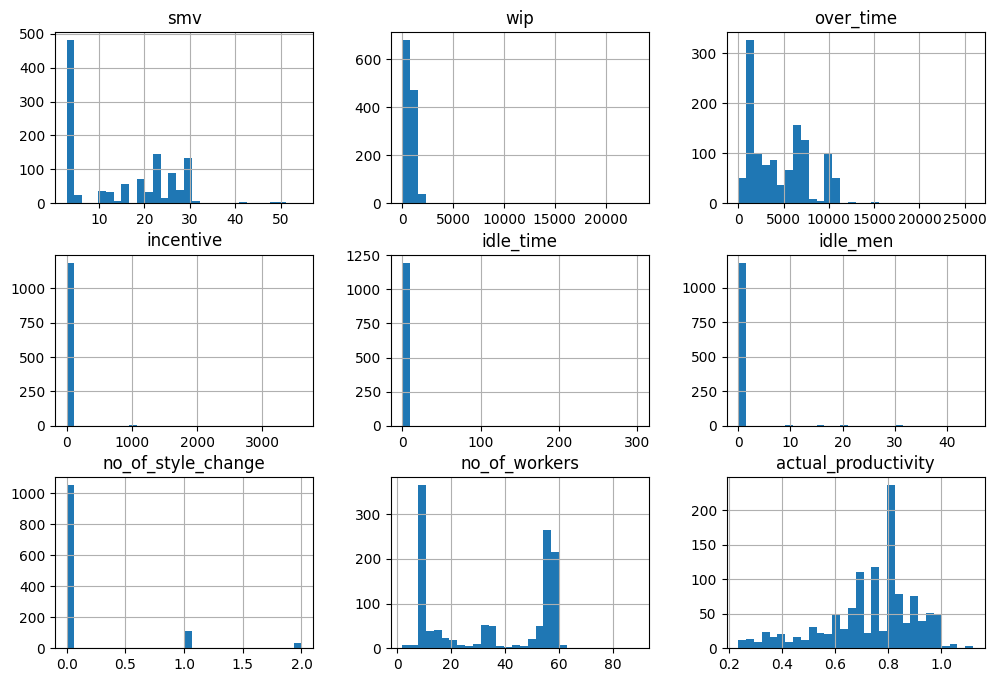

In [ ]:
import matplotlib.pyplot as plt

df.loc[:, 'smv':'actual_productivity'].hist(figsize=(12, 8), bins=30)
plt.show()


**Seleksi Fitur digunakan untuk mengidentifikasi variabel penting yang berarti tidak semua fitur berkontribusi signifikan terhadap prediksi, sehingga beberapa fitur dihapus untuk meningkatkan akurasi dan efisiensi model.**

Cek Multikolinearitas antar variabel menggunakan VIF, jika nilai VIF > 10 maka dikatakan terjadi multikolinearitas. Menghapus variabel yang memiliki multikolinearitas penting untuk dilakukan karena variabel dengan VIF tinggi biasanya tidak memberikan informasi baru, karena isinya sudah sangat mirip dengan variabel lain.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Daftar variabel independen awal
independent_vars = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time',
    'idle_men', 'no_of_workers', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
    'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_sweing',
    'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
    'team_1', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8',
    'team_9', 'team_10', 'team_11', 'team_12'
]

# Pastikan semua variabel ada dalam dataframe
independent_vars = [var for var in independent_vars if var in df.columns]

# Buat dataframe X dan target y
X = df[independent_vars]
y = df['actual_productivity']

# Fungsi untuk menghitung VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Hapus variabel dengan VIF tinggi (>10)
threshold_vif = 10
while True:
    vif_df = calculate_vif(X)
    max_vif = vif_df["VIF"].max()

    if max_vif < threshold_vif:
        break  # Jika semua VIF < threshold, stop

    drop_var = vif_df.loc[vif_df["VIF"].idxmax(), "Variable"]
    print(f"Dropping {drop_var} (VIF={max_vif:.2f})")
    X = X.drop(columns=[drop_var])


Dropping no_of_workers (VIF=68.61)
Dropping smv (VIF=16.91)
Dropping targeted_productivity (VIF=15.16)


Membuang variabel yang tidak signifikan penting dilakukan karena variabel yang tidak signifikan dalam OLS berarti tidak memiliki hubungan yang cukup kuat dengan target. Kalau tetap dipertahankan, variabel ini bisa menambah noise yang malah bikin model bingung saat mencari pola yang sebenarnya.

Tujuan utama feature selection adalah mempertahankan variabel yang benar-benar relevan, jadi kalau dari awal sudah tahu ada yang tidak signifikan, lebih baik dibuang.

In [ ]:
# Ambang batas signifikansi
threshold_p = 0.05

while True:
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    max_p = p_values.max()

    if max_p < threshold_p:
        break  # Jika semua variabel signifikan, stop

    drop_var = p_values.idxmax()  # Ambil variabel dengan p-value terbesar
    print(f"Dropping {drop_var} (p-value={max_p:.4f})")
    X = X.drop(columns=[drop_var])

Dropping idle_time (p-value=0.6141)
Dropping department_sweing (p-value=0.1529)


Dilakukan prediksi menggunakan regresi (OLS) sehingga didapatkan model yang akurat dan berpengaruh terhadap variabel target

In [ ]:
# Bangun model final setelah seleksi fitur
final_model = sm.OLS(y, X).fit()

# Hasil regresi
print(final_model.summary())

# Hitung RMSE
y_pred = final_model.predict(X)
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"\nFinal RMSE: {rmse:.4f}")

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.897
Model:                             OLS   Adj. R-squared (uncentered):              0.895
Method:                  Least Squares   F-statistic:                              426.4
Date:                 Mon, 24 Mar 2025   Prob (F-statistic):                        0.00
Time:                         01:51:49   Log-Likelihood:                         -1.4825
No. Observations:                 1197   AIC:                                      50.97
Df Residuals:                     1173   BIC:                                      173.1
Df Model:                           24                                                  
Covariance Type:             nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**RANDOM FOREST, GRADIENT BOOSTING, DAN XGBOOST**

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

**Model Sebelum diseleksi fitur menggunakan Random Forest**

In [ ]:
# Model Random Forest sebelum seleksi fitur OLS
rf_model_before = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_before.fit(X_train, y_train)
y_pred_rf_before = rf_model_before.predict(X_test)
rmse_rf_before = sqrt(mean_squared_error(y_test, y_pred_rf_before))

# Model XGBoost sebelum seleksi fitur
xgb_model_before = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model_before.fit(X_train, y_train)
y_pred_xgb_before = xgb_model_before.predict(X_test)
rmse_xgb_before = sqrt(mean_squared_error(y_test, y_pred_xgb_before))

# Model Gradient Boosting sebelum seleksi fitur
gb_model_before = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_before.fit(X_train, y_train)
y_pred_gb_before = gb_model_before.predict(X_test)
rmse_gb_before = sqrt(mean_squared_error(y_test, y_pred_gb_before))

# Tampilkan hasil RMSE sebelum seleksi fitur
print("📊 RMSE Sebelum Seleksi Fitur:")
print(f"✅ Random Forest  : {rmse_rf_before:.4f}")
print(f"✅ XGBoost        : {rmse_xgb_before:.4f}")
print(f"✅ Gradient Boost : {rmse_gb_before:.4f}")

📊 RMSE Sebelum Seleksi Fitur:
✅ Random Forest  : 0.1348
✅ XGBoost        : 0.1389
✅ Gradient Boost : 0.1336



📌 Daftar Fitur Berdasarkan Tingkat Pengaruhnya:
             Feature  Importance
2          incentive    0.231385
1          over_time    0.212110
0                wip    0.126740
6   quarter_Quarter4    0.043859
19            team_8    0.034816
4   quarter_Quarter2    0.029650
9         day_Sunday    0.028555
8       day_Saturday    0.025927
5   quarter_Quarter3    0.024358
12     day_Wednesday    0.022546
10      day_Thursday    0.022375
11       day_Tuesday    0.022367
21           team_10    0.020948
22           team_11    0.020000
17            team_6    0.018073
18            team_7    0.017455
14            team_3    0.016495
16            team_5    0.015280
20            team_9    0.014711
15            team_4    0.014485
13            team_2    0.012076
7   quarter_Quarter5    0.009074
23           team_12    0.009034
3           idle_men    0.007682


<ipython-input-504-d3ea55f07e4f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")


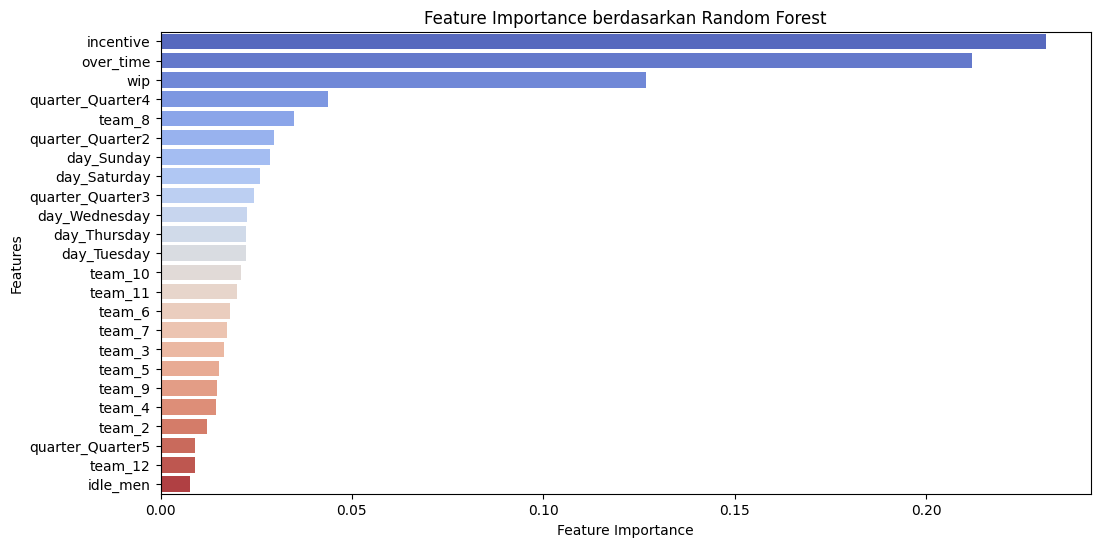

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Ambil feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
})

# Urutkan berdasarkan tingkat pengaruh tertinggi
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Tampilkan daftar fitur berdasarkan tingkat pengaruhnya
print("\n📌 Daftar Fitur Berdasarkan Tingkat Pengaruhnya:")
print(feature_importance)

# Visualisasi Feature Importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance berdasarkan Random Forest")
plt.show()

**Seleksi Fitur Menggunakan Threshold 0.01**

In [ ]:
# Ambang batas importance (misalnya 0.01)
threshold = 0.01

# Pilih fitur yang memiliki importance lebih besar dari threshold
selected_features = feature_importance[feature_importance["Importance"] > threshold]["Feature"].tolist()

# Buat dataset baru dengan fitur yang terseleksi
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Tampilkan fitur yang dipilih
print("\n📌 Fitur yang dipertahankan setelah seleksi:")
print(selected_features)



📌 Fitur yang dipertahankan setelah seleksi:
['incentive', 'over_time', 'wip', 'quarter_Quarter4', 'team_8', 'quarter_Quarter2', 'day_Sunday', 'day_Saturday', 'quarter_Quarter3', 'day_Wednesday', 'day_Thursday', 'day_Tuesday', 'team_10', 'team_11', 'team_6', 'team_7', 'team_3', 'team_5', 'team_9', 'team_4', 'team_2']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


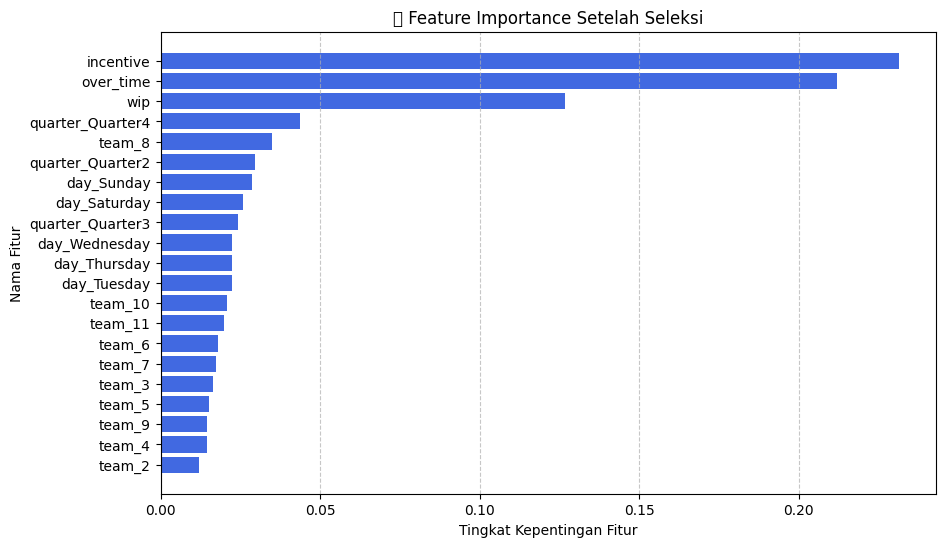

In [ ]:
import matplotlib.pyplot as plt

# Filter importance hanya untuk fitur yang dipilih
filtered_importance = feature_importance[feature_importance["Feature"].isin(selected_features)]

# Urutkan fitur berdasarkan tingkat pengaruhnya
filtered_importance = filtered_importance.sort_values(by="Importance", ascending=False)

# Plot hasil feature importance setelah seleksi
plt.figure(figsize=(10, 6))
plt.barh(filtered_importance["Feature"], filtered_importance["Importance"], color="royalblue")
plt.xlabel("Tingkat Kepentingan Fitur")
plt.ylabel("Nama Fitur")
plt.title("📊 Feature Importance Setelah Seleksi")
plt.gca().invert_yaxis()  # Membalik sumbu agar fitur dengan importance tertinggi di atas
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

In [ ]:
# Model Random Forest setelah seleksi fitur
rf_model_after = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_after.fit(X_train_selected, y_train)
y_pred_rf_after = rf_model_after.predict(X_test_selected)
rmse_rf_after = sqrt(mean_squared_error(y_test, y_pred_rf_after))

# Model XGBoost setelah seleksi fitur
xgb_model_after = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model_after.fit(X_train_selected, y_train)
y_pred_xgb_after = xgb_model_after.predict(X_test_selected)
rmse_xgb_after = sqrt(mean_squared_error(y_test, y_pred_xgb_after))

# Model Gradient Boosting setelah seleksi fitur
gb_model_after = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_after.fit(X_train_selected, y_train)
y_pred_gb_after = gb_model_after.predict(X_test_selected)
rmse_gb_after = sqrt(mean_squared_error(y_test, y_pred_gb_after))

<ipython-input-508-24df27c117ad>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette=colors, edgecolor="black")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


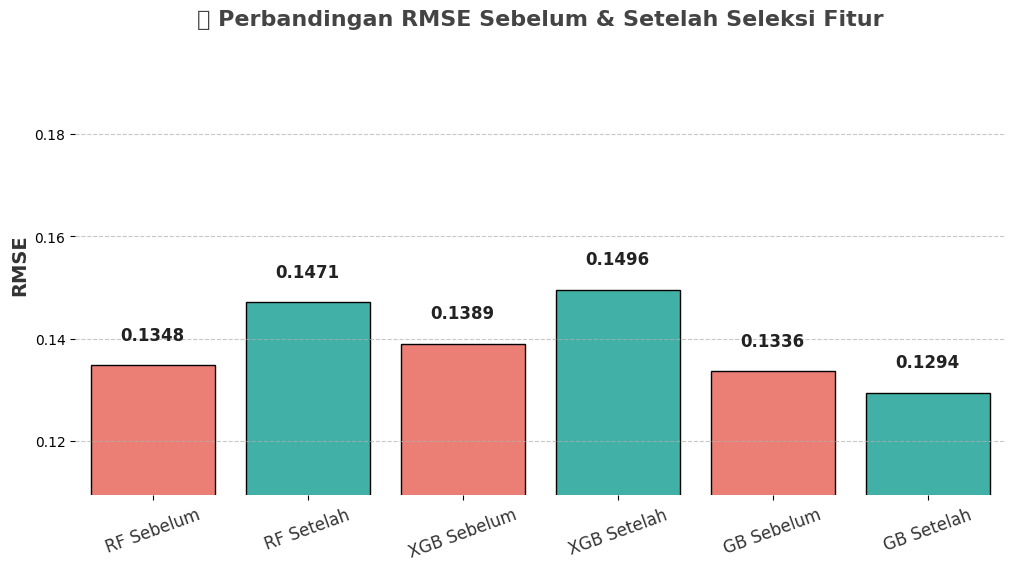

In [ ]:
import seaborn as sns

# Data untuk visualisasi
models = ["RF Sebelum", "RF Setelah", "XGB Sebelum", "XGB Setelah", "GB Sebelum", "GB Setelah"]
rmse_values = [rmse_rf_before, rmse_rf_after, rmse_xgb_before, rmse_xgb_after, rmse_gb_before, rmse_gb_after]

# Palet warna yang lebih estetis
colors = ["#FF6F61", "#2EC4B6", "#FF6F61", "#2EC4B6", "#FF6F61", "#2EC4B6"]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=rmse_values, palette=colors, edgecolor="black")

# Tambahkan detail pada grafik
plt.ylabel("RMSE", fontsize=14, fontweight="bold", color="#333333")
plt.xlabel("", fontsize=12)
plt.title("📊 Perbandingan RMSE Sebelum & Setelah Seleksi Fitur", fontsize=16, fontweight="bold", color="#444444")

# Tambahkan nilai RMSE di atas setiap bar
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.005, f"{value:.4f}", ha='center', fontsize=12, fontweight="bold", color="#222222")

# Tata letak lebih clean
plt.ylim(min(rmse_values) - 0.02, max(rmse_values) + 0.05)
plt.xticks(rotation=20, fontsize=12, color="#333333")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Tampilkan plot
plt.show()



## **Hyperparameter**

In [ ]:
# ==========================================
# Hyperparameter Tuning Setelah Visualisasi
# ==========================================

# RandomizedSearchCV untuk Random Forest
param_dist_rf = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    n_jobs=1,
    verbose=0,
    scoring='r2',
    random_state=42
)

random_search_rf.fit(X_train_selected, y_train)
best_rf = random_search_rf.best_estimator_

# Evaluasi
y_pred_rf_best = best_rf.predict(X_test_selected)
rmse_rf_best = sqrt(mean_squared_error(y_test, y_pred_rf_best))

print("\n===== Evaluasi RandomizedSearchCV (Random Forest) =====")
print("Best Params:", random_search_rf.best_params_)
print(f"R2 Score   : {r2_score(y_test, y_pred_rf_best):.4f}")
print(f"RMSE       : {rmse_rf_best:.4f}")

# ==========================================
# GridSearchCV untuk XGBoost
# ==========================================
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    n_jobs=1,
    verbose=0,
    scoring='r2'
)

grid_search_xgb.fit(X_train_selected, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Evaluasi
y_pred_xgb_best = best_xgb.predict(X_test_selected)
rmse_xgb_best = sqrt(mean_squared_error(y_test, y_pred_xgb_best))

print("\n===== Evaluasi GridSearchCV (XGBoost) =====")
print("Best Params:", grid_search_xgb.best_params_)
print(f"R2 Score   : {r2_score(y_test, y_pred_xgb_best):.4f}")
print(f"RMSE       : {rmse_xgb_best:.4f}")

# ==========================================
# GridSearchCV untuk Gradient Boosting
# ==========================================
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=3,
    n_jobs=1,
    verbose=0,
    scoring='r2'
)

grid_search_gb.fit(X_train_selected, y_train)
best_gb = grid_search_gb.best_estimator_

# Evaluasi
y_pred_gb_best = best_gb.predict(X_test_selected)
rmse_gb_best = sqrt(mean_squared_error(y_test, y_pred_gb_best))

print("\n===== Evaluasi GridSearchCV (Gradient Boosting) =====")
print("Best Params:", grid_search_gb.best_params_)
print(f"R2 Score   : {r2_score(y_test, y_pred_gb_best):.4f}")
print(f"RMSE       : {rmse_gb_best:.4f}")


===== Evaluasi RandomizedSearchCV (Random Forest) =====
Best Params: {'n_estimators': np.int64(150), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(20)}
R2 Score   : 0.3183
RMSE       : 0.1345

===== Evaluasi GridSearchCV (XGBoost) =====
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
R2 Score   : 0.3147
RMSE       : 0.1349

===== Evaluasi GridSearchCV (Gradient Boosting) =====
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R2 Score   : 0.3695
RMSE       : 0.1294
